In [7]:
!python --version

Python 2.7.15 :: Anaconda, Inc.


In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data for News Popularity

In [260]:
df = pd.read_csv("OnlineNewsPopularity.csv",sep=",",header="infer")

In [261]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [262]:
df.shape

(39644, 61)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

In [264]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [265]:
def reduce_variance(x):
    if int(x)<3395:
        return 0
    else:
        return 1

In [266]:
df['shares'] = df['shares'].apply(reduce_variance)

# EDA on News Popularity data

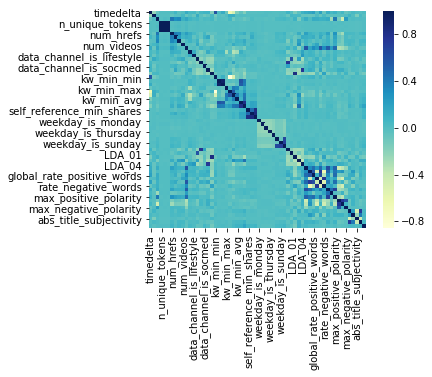

In [267]:
correlations = df.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [268]:
#sns.pairplot(df)
len(df.keys())
#test_df = df.head(10)

61

In [269]:
df.keys()

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [270]:
df = df[['n_unique_tokens','num_hrefs','num_videos','data_channel_is_lifestyle','data_channel_is_socmed','kw_min_min',
        'kw_min_max','kw_min_avg','self_reference_min_shares','weekday_is_monday','weekday_is_thursday','weekday_is_sunday',
        'LDA_01','LDA_04','global_rate_positive_words','rate_negative_words','max_positive_polarity','max_negative_polarity',
        'abs_title_subjectivity','shares']]

In [271]:
len(df.keys())

20

# Dividing data

In [272]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=85)

X_train = train.iloc[:,0:19]
Y_train = train.iloc[:,19]
X_test = test.iloc[:,0:19]
Y_test = test.iloc[:,19]

# PCA with Scaling

In [275]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [276]:
X_train = scaler.fit(X_train).transform(X_train)

In [277]:
X_test = scaler.transform(X_test)

In [278]:
pca = PCA(n_components=2,svd_solver="arpack")

In [279]:
X_train =  pca.fit(X_train).transform(X_train)

In [280]:
X_test = pca.transform(X_test)

In [281]:
pca.n_components_

2

In [282]:
pca.n_components_

2

# Applying Linear Regression

In [283]:
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression

In [284]:
model = LinearRegression()

In [285]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [286]:
model.intercept_

0.20375216774396973

In [287]:
y_pred = model.predict(X_test)

In [288]:
y_pred

array([0.20468314, 0.20282315, 0.19640892, ..., 0.20299189, 0.20585956,
       0.19623377])

In [289]:
from sklearn import metrics

In [290]:
metrics.accuracy_score(y_pred.astype(int),Y_test)

0.796065077563375

In [291]:
metrics.mean_squared_error(y_pred,Y_test)

0.16230814825333081

In [292]:
pca.explained_variance_ratio_

array([0.1748364, 0.1430581])

# With Linear Regression Accuracy is 79.6%

# Applying Logistic Regression

In [294]:
logisticR = LogisticRegression()
logisticR.fit(X_train,Y_train)

/Users/anubhav.nanda/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [296]:
y_logistic_pred = logisticR.predict(X_test)

In [297]:
y_logistic_pred

array([0, 0, 0, ..., 0, 0, 0])

In [306]:
print(metrics.accuracy_score(y_logistic_pred,Y_test)*100,'%')

79.60650775633749 %


# With Logistic Regression Accuracy is 79.6%

# Applying Decision Tree Classifier

In [299]:
from sklearn import tree

In [300]:
clf = tree.DecisionTreeClassifier()

In [301]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [302]:
y_dt_pred = clf.predict(X_test)

In [305]:
print(metrics.accuracy_score(y_dt_pred,Y_test)*100,'%')

68.82330684827848 %


# Decision tree model accuracy is 68.8%

# Applying Random Forest Classifier

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [315]:
rndclf=RandomForestClassifier(n_estimators=1000,criterion="gini")

In [316]:
rndclf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [317]:
y_rf_pred = rndclf.predict(X_test)

In [318]:
print(metrics.accuracy_score(y_rf_pred,Y_test)*100,'%')

76.63009206709546 %


# With Random Forest Accuracy is 76.6%

# Applying SVM

In [324]:
from sklearn import svm

In [320]:
svmclf = svm.SVC(gamma='scale')

In [321]:
svmclf.fit(X_train, Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [322]:
y_svm_pred = svmclf.predict(X_test)

In [323]:
print(metrics.accuracy_score(y_svm_pred,Y_test)*100,'%')

79.60650775633749 %


# With SVM Accuracy is 79.6%

In [325]:
from sklearn.neighbors import KNeighborsClassifier